### Data loading and pre-processing

In [1]:
# importing libraries
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from pydotplus import graph_from_dot_data 
from sklearn.tree import export_graphviz 
from IPython.display import Image
import graphviz
import pydotplus

In [2]:
# loading the dataset
df = pd.read_csv("~/Desktop/heart.csv")

In [3]:
# checking size of dataset
df.shape

(1025, 14)

In [4]:
# visualizing dataset
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [5]:
# checking datatype and null values in each column
df.info() # no null values and datatypes are also correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# checking std, min, max etc of each column
df.describe() 
# the data needed scalling but since we will apply decision tree model on this we can skip this as decision tree doesnt require the data to be scaled


age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

### Basic EDA

In [7]:
# visualizing distrubution of target feature
colors = ['gold', 'mediumturquoise']
fig = go.Figure(data = [go.Pie(labels = ['Has Heart Disease','Does not have Heart Disease'],
                             values = [len(df[df['target'] == 0]),len(df[df['target'] == 1])])])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'value', textfont_size = 22,
                  marker = dict(colors = ['gold', 'mediumturquoise'], line = dict(color='#000000', width = 4)))
fig.show()

# Conclusion: Data is balanced with respect to target feature

In [8]:
# forming new dataframe by grouping gender
df1 = df.groupby(by = ["target", "sex"]).size().reset_index(name = "counts")
df1['target'] = df1['target'].astype(str)

# converting datatype to string 
df1['sex'] = df1['sex'].astype(str)
df1['sex'] = df1['sex'].map({'0':'Female', '1':'Male'})

# visualizing count of male and female who has and does not have heart disease
fig = px.bar(df1, x = "target", y = "counts", color = "sex", text_auto = True)
fig.show()

# Concluson: Females have more heart disease than men

In [9]:
# forming new dataframe by grouping chest pain type (cp)
df1 = df.groupby(by = ["target", "cp"]).size().reset_index(name = "counts")

# converting datatype to string 
df1['target'] = df1['target'].astype(str)
df1['cp'] = df1['cp'].astype(str)

fig = px.bar(df1, x = "target", y = "counts", text_auto = True , color = 'cp')

fig.show()

# Conclusion: People who have chest pain of type 2 are more prone towards having a heart disease
# People who have chest pain of type 0 are more prone towards not having a heart disease

In [10]:
df1 = df
# converting datatype to string 
df1['target'] = df['target'].astype(str)
df1['sex'] = df['sex'].astype(int)

# plotting 
fig = px.scatter(df, x="age", y="thalach", color="target") # thalach: maximum heart rate achived
fig.show()

# Conclusion: People with thalach above 160 and between the age of 40 to 50 are more prone to having heart disease
# People with thalach below 140 and between the age of 50 to 65 are more prone to not having a heart disease

In [11]:
# Outliers: not checking as Decision trees are not sensitive to outliers
# Multicollinearity: not checking as Decision trees are not affected by multicollinearity

### Building Decision Tree Model

In [12]:
# splitting data to train and test set
y = df['target']
df.drop(['target'], axis=1,inplace = True)
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=1)


In [13]:
# building decision tree model with Gini Index as the loss function
gini = DecisionTreeClassifier(criterion = 'gini', random_state = 89)
gini = gini.fit(X_train,y_train)

y_pred_gini = gini.predict(X_test)

In [14]:
print("Accuracy of Decesion Tree with Gini Index as the loss function: ", round((metrics.accuracy_score(y_test, y_pred_gini))*100,2))
      

Accuracy of Decesion Tree with Gini Index as the loss function:  95.12


In [15]:
# building decision tree model with Gini Index as the loss function
entropy = DecisionTreeClassifier(criterion = 'entropy',random_state = 69)
entropy = entropy.fit(X_train,y_train)

y_pred_entropy = entropy.predict(X_test)

In [16]:
print("Accuracy of Decesion Tree with Entropy as the loss function: ", round((metrics.accuracy_score(y_test, y_pred_entropy))*100,2))


Accuracy of Decesion Tree with Entropy as the loss function:  95.85


### Visualizing Decision Tree

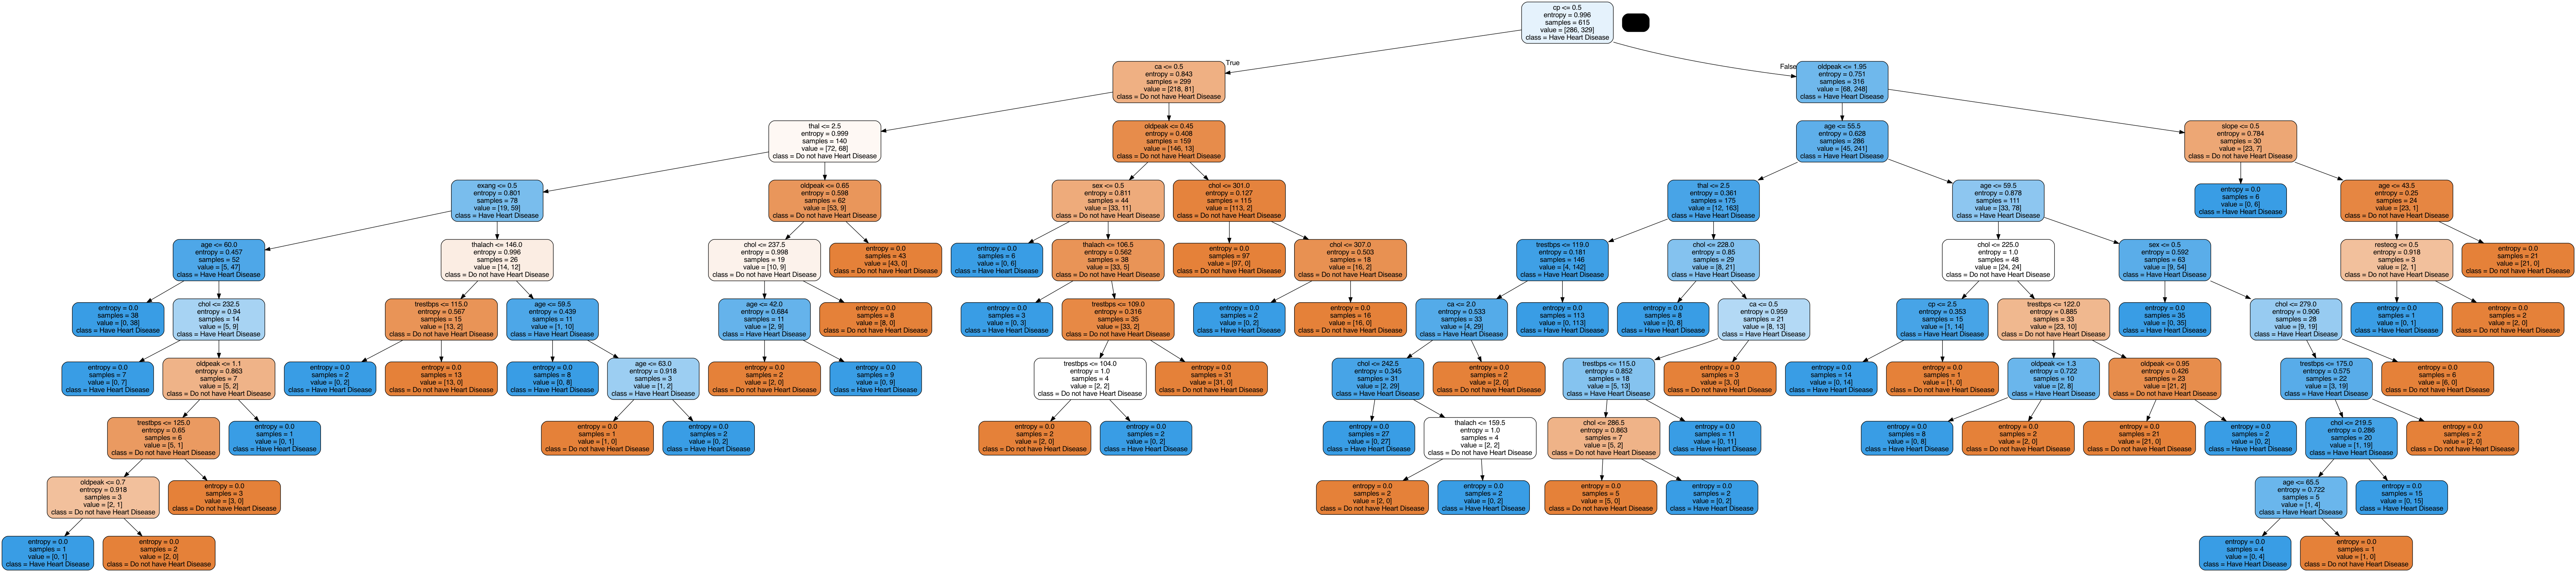

In [17]:
temp = export_graphviz(entropy, filled = True, rounded = True, 
                       class_names = ['Do not have Heart Disease', 'Have Heart Disease'], 
                       feature_names = list(df.columns), out_file = None) 
dt = graph_from_dot_data(temp) 
dt.write_png('/Users/amritaaash/Desktop/tree.png')
Image(dt.create_png())

### Finding best parameter for min_samples_split

In [18]:
s = [2,3,4,8,10,16,20,35] # taking some values to be used for min_samples_split

test_acc = []
train_acc = []

# training train set against each value of min_samples_split and storing the train and test accuracy
for i in s:
    model = DecisionTreeClassifier(criterion = 'entropy',random_state = 60,min_samples_split = i)

    model = model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    
    test_acc.append(metrics.accuracy_score(y_test, y_pred))
    
    train_acc.append(metrics.accuracy_score(y_train, model.predict(X_train)))


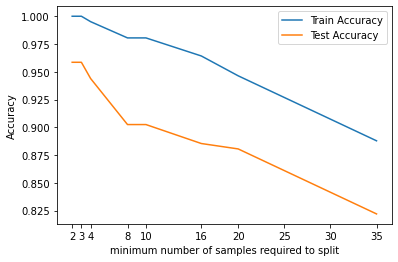

In [19]:
plt.plot(s,train_acc, label = "Train Accuracy")
plt.plot (s, test_acc,label = "Test Accuracy")
plt.xticks([2,3,4,8,10,16,20,25,30,35])
plt.legend()
plt.xlabel("minimum number of samples required to split")
plt.ylabel("Accuracy")
plt.show()

In [20]:
# Conclusion: the best value of minimum number of samples are 4 after which with increase in sample size train test accuracy decreases
